In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import glob
import pickle
from pylab import *
%matplotlib inline

In [11]:
#path = '/nfs/nhome/live/vincenta/git/gatsby-hackathon-seizure/results/'
path = '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/'

folder = 'kaggle_2_train_test'


features = [
        'ARFeatures()',
        'VarLagsARFeatures(2)',
        'VarLagsARFeatures(3)',
        'VarLagsARFeatures(4)',
        'VarLagsARFeatures(7)',
        'SEFeatures()',
        'PLVFeatures()',
        'StackFeatures(VarLagsARFeatures(2), PLVFeatures(), SEFeatures())',
        'StackFeatures(VarLagsARFeatures(2), SEFeatures())',
        'StackFeatures(ARFeatures(), VarLagsARFeatures(2), SEFeatures())',
        'StackFeatures(ARFeatures(), VarLagsARFeatures(2), PLVFeatures(), SEFeatures())',
        'StackFeatures(VarLagsARFeatures(2), VarLagsARFeatures(4), PLVFeatures(), SEFeatures())'
    ]


features_names = [
        'VAR(1)',
        'VAR(2)',
        'VAR(3)',
        'VAR(4)',
        'VAR(7)',
        'SE',
        'PLV',
        'VAR(2)+PLV+SE',
        'VAR(2)+SE',
        'VAR(1)+VAR(2)+SE',
        'VAR(1)+VAR(2)+PLV+SE',
        'VAR(2)+VAR(4)+PLV+SE' ]

range_feat = [1, 5, 6, 10] 

keys = [ 'y_early_true',
         'seizure_auc',
         'early_auc',
         'y_seizure_pred',
         'filenames',
         'y_seizure_true',
         'predictor', 
         'feature_extractor', 
         'y_early_pred']


fpr_seiz = dict()
tpr_seiz = dict()
roc_auc_seiz = dict()

fpr_early = dict()
tpr_early = dict()
roc_auc_early = dict()

task = 2
i=-1
files = glob.glob(path+folder+'/'+'*.p')

for feat_index in range_feat:
    i=i+1
    Y_true_seizure = []
    Y_pred_seizure = []
    Y_true_early = []
    Y_pred_early = []
    print features_names[feat_index]
    for i_f,f in enumerate(files):
        result_list = pickle.load(open(f,'rb'))
        Y_true_seizure+=result_list[feat_index]['y_seizure_true'].tolist()
        Y_pred_seizure+=result_list[feat_index]['y_seizure_pred'].tolist()
        Y_true_early+=result_list[feat_index]['y_early_true'].tolist()
        Y_pred_early+=result_list[feat_index]['y_early_pred'].tolist()

    fpr_seiz[i], tpr_seiz[i], _ = roc_curve(Y_true_seizure, Y_pred_seizure)
    roc_auc_seiz[i] = auc(fpr_seiz[i], tpr_seiz[i])
    
    fpr_early[i], tpr_early[i], _ = roc_curve(Y_true_early, Y_pred_early)
    roc_auc_early[i] = auc(fpr_early[i], tpr_early[i])

VAR(2)
SE
PLV
VAR(1)+VAR(2)+PLV+SE


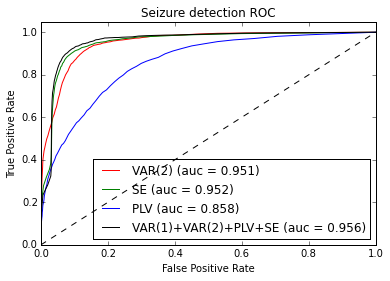

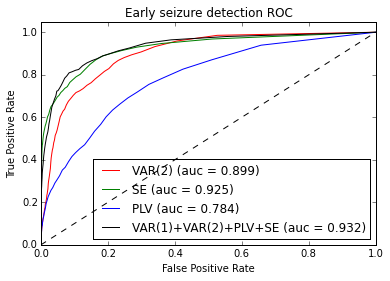

In [12]:
colorfeat=['r','g','b','k']

fig=plt.figure()
for i in range(len(range_feat)):
    lines=plt.plot(fpr_seiz[i], tpr_seiz[i], label='%s (auc = %0.3f)' % (features_names[range_feat[i]], roc_auc_seiz[i]))
    plt.setp(lines, color=colorfeat[i])


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Seizure detection ROC')
plt.legend(loc="lower right")
plt.show()
fig.savefig(folder+'_ROCseizure'+'.pdf',bbox_inches='tight')


fig=plt.figure()
for i in range(len(range_feat)):
    lines=plt.plot(fpr_early[i], tpr_early[i], label='%s (auc = %0.3f)' % (features_names[range_feat[i]], roc_auc_early[i]))
    plt.setp(lines, color=colorfeat[i])


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Early seizure detection ROC')
plt.legend(loc="lower right")
plt.show()
fig.savefig(folder+'_ROCearly'+'.pdf',bbox_inches='tight')